# STOCK MARKET PREDICTION 

**Stock used:- Netflix**

TASK-1

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
netflix_data = pd.read_csv("NFLX.csv")
netflix_data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100


## Gathering info about the data

In [3]:
netflix_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100
5043,2022-06-03,200.139999,202.949997,198.050003,198.979996,198.979996,7181700


In [4]:
netflix_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [6]:
netflix_data.shape

(5044, 7)

In [7]:
netflix_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


In [8]:
netflix_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
netflix_data1 = netflix_data.reset_index()['Close']
netflix_data1

0         1.196429
1         1.210000
2         1.157143
3         1.103571
4         1.071429
           ...    
5039    195.190002
5040    197.440002
5041    192.910004
5042    205.089996
5043    198.979996
Name: Close, Length: 5044, dtype: float64

In [10]:
netflix_data1.shape

(5044,)

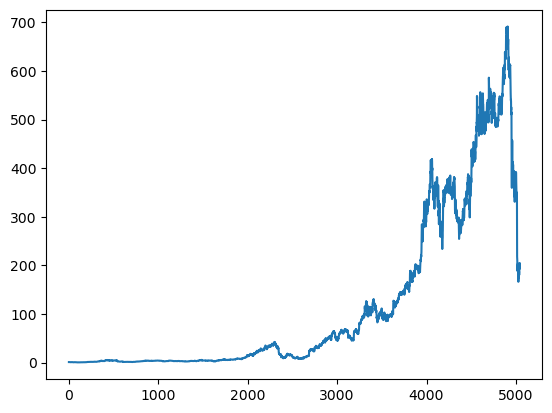

In [11]:
plt.plot(netflix_data1);

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
netflix_data1=scaler.fit_transform(np.array(netflix_data1).reshape(-1,1))

In [13]:
netflix_data1

array([[0.00119131],
       [0.00121094],
       [0.00113448],
       ...,
       [0.2785077 ],
       [0.29612623],
       [0.28728803]])

In [14]:
netflix_data1.shape

(5044, 1)

## Preprocessing

In [15]:
training_size=int(len(netflix_data1)*0.75)
test_size=len(netflix_data1)-training_size
train_data,test_data=netflix_data1[0:training_size,:],netflix_data1[training_size:len(netflix_data1), :1]

In [16]:
training_size,test_size

(3783, 1261)

In [17]:
train_data

array([[0.00119131],
       [0.00121094],
       [0.00113448],
       ...,
       [0.23556069],
       [0.23534372],
       [0.235228  ]])

In [18]:
test_data

array([[0.23839585],
       [0.23822227],
       [0.23838139],
       ...,
       [0.2785077 ],
       [0.29612623],
       [0.28728803]])

In [19]:
# converting an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)    

In [20]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_train, y_train

(array([[1.19130851e-03, 1.21093916e-03, 1.13448076e-03, ...,
         1.93213782e-04, 1.41551531e-04, 2.33509325e-04],
        [1.21093916e-03, 1.13448076e-03, 1.05698811e-03, ...,
         1.41551531e-04, 2.33509325e-04, 2.56239848e-04],
        [1.13448076e-03, 1.05698811e-03, 1.01049425e-03, ...,
         2.33509325e-04, 2.56239848e-04, 1.25020767e-04],
        ...,
        [1.83876737e-01, 1.86654053e-01, 1.90125678e-01, ...,
         2.27937555e-01, 2.27648257e-01, 2.35314786e-01],
        [1.86654053e-01, 1.90125678e-01, 1.89055271e-01, ...,
         2.27648257e-01, 2.35314786e-01, 2.34417933e-01],
        [1.90125678e-01, 1.89055271e-01, 1.88881675e-01, ...,
         2.35314786e-01, 2.34417933e-01, 2.35560690e-01]]),
 array([2.56239848e-04, 1.25020767e-04, 2.56239848e-04, ...,
        2.34417933e-01, 2.35560690e-01, 2.35343722e-01]))

In [21]:
X_test.shape, y_test.shape

((1160, 100), (1160,))

In [22]:
# reshaping req for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Creating the LSTM model

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
58/58 [==============================] - 9s 115ms/step - loss: 4.3793e-04 - val_loss: 0.0023
Epoch 2/100
58/58 [==============================] - 6s 108ms/step - loss: 2.9781e-05 - val_loss: 0.0023
Epoch 3/100
58/58 [==============================] - 6s 111ms/step - loss: 3.1042e-05 - val_loss: 0.0023
Epoch 4/100
58/58 [==============================] - 7s 112ms/step - loss: 2.7458e-05 - val_loss: 0.0021
Epoch 5/100
58/58 [==============================] - 7s 116ms/step - loss: 2.7077e-05 - val_loss: 0.0021
Epoch 6/100
58/58 [==============================] - 7s 117ms/step - loss: 2.3459e-05 - val_loss: 0.0021
Epoch 7/100
58/58 [==============================] - 7s 116ms/step - loss: 2.3883e-05 - val_loss: 0.0021
Epoch 8/100
58/58 [==============================] - 7s 117ms/step - loss: 2.1839e-05 - val_loss: 0.0022
Epoch 9/100
58/58 [==============================] - 7s 114ms/step - loss: 2.4407e-05 - val_loss: 0.0019
Epoch 10/100
58/58 [==============================] - 7

Epoch 77/100
58/58 [==============================] - 109s 2s/step - loss: 4.7927e-06 - val_loss: 4.1166e-04
Epoch 78/100
58/58 [==============================] - 7s 117ms/step - loss: 4.8682e-06 - val_loss: 4.3017e-04
Epoch 79/100
58/58 [==============================] - 7s 117ms/step - loss: 4.7609e-06 - val_loss: 8.1547e-04
Epoch 80/100
58/58 [==============================] - 7s 117ms/step - loss: 4.5907e-06 - val_loss: 5.4389e-04
Epoch 81/100
58/58 [==============================] - 7s 118ms/step - loss: 4.5596e-06 - val_loss: 4.4660e-04
Epoch 82/100
58/58 [==============================] - 7s 117ms/step - loss: 3.9569e-06 - val_loss: 5.3875e-04
Epoch 83/100
58/58 [==============================] - 3848s 68s/step - loss: 5.3810e-06 - val_loss: 0.0010
Epoch 84/100
58/58 [==============================] - 7s 118ms/step - loss: 4.7535e-06 - val_loss: 9.7554e-04
Epoch 85/100
58/58 [==============================] - 7s 121ms/step - loss: 4.4849e-06 - val_loss: 4.0376e-04
Epoch 86/100
5

# Predicting test data and ploting the output

In [70]:
# Let's do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

37/37 [==============================] - 1s 17ms/step


In [71]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [72]:
# Calculating Root Mean Squared Error
math.sqrt(mean_squared_error(y_train,train_predict))

47.395435520285

In [73]:
# Test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

403.0446924214195

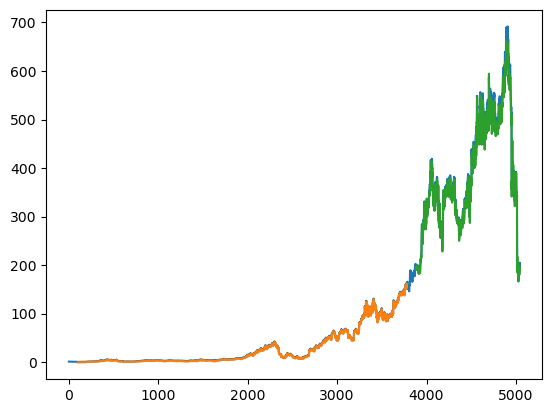

In [36]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(netflix_data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(netflix_data1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(netflix_data1)-1, :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(netflix_data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Predicting the Future for 30 days and plot the output

In [37]:
len(test_data)

1261

In [42]:
x_input=test_data[1161:].reshape(1, -1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input


[0.781793383700906,
 0.7765569216426708,
 0.7504907968107748,
 0.7598786588751534,
 0.7383400436278778,
 0.7456594006503339,
 0.7346514500229846,
 0.5744500130978235,
 0.559478583451015,
 0.5294923735762403,
 0.5197717973564795,
 0.5588276781418461,
 0.5554427960845668,
 0.6173247128132485,
 0.6607056563019277,
 0.6207095500285906,
 0.586166786012518,
 0.5927773655895658,
 0.581103986651452,
 0.5831724916933745,
 0.596711886843194,
 0.5871359258708967,
 0.5654960879062242,
 0.5731047651074818,
 0.5888572805466873,
 0.575288972472974,
 0.5587842841652653,
 0.5654671735358161,
 0.54534615657478,
 0.5309967164202183,
 0.5636445513006912,
 0.5647583512484706,
 0.5701393851587464,
 0.5581622498310813,
 0.549179410269074,
 0.5318791131673726,
 0.5227082195393836,
 0.5061167013296046,
 0.49382133145273,
 0.51845546518306,
 0.5155334777643913,
 0.4917383468046347,
 0.4782713048437414,
 0.49669988005288074,
 0.5166328429479351,
 0.5366959863262177,
 0.5500039334334749,
 0.5413103692083319,
 0.5

In [44]:
from numpy import array

output_1st=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input=x_input.reshape(1,-1)
        x_input= x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        output_1st.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat= model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        output_1st.extend(yhat.tolist())
        i=i+1

        
print(output_1st)

[0.2861357]
101
1 day input [0.77655692 0.7504908  0.75987866 0.73834004 0.7456594  0.73465145
 0.57445001 0.55947858 0.52949237 0.5197718  0.55882768 0.5554428
 0.61732471 0.66070566 0.62070955 0.58616679 0.59277737 0.58110399
 0.58317249 0.59671189 0.58713593 0.56549609 0.57310477 0.58885728
 0.57528897 0.55878428 0.56546717 0.54534616 0.53099672 0.56364455
 0.56475835 0.57013939 0.55816225 0.54917941 0.53187911 0.52270822
 0.5061167  0.49382133 0.51845547 0.51553348 0.49173835 0.4782713
 0.49669988 0.51663284 0.53669599 0.55000393 0.54131037 0.55335986
 0.54116571 0.54293046 0.54023996 0.54698072 0.56623382 0.55126239
 0.54131037 0.53969028 0.56577093 0.54935298 0.53228414 0.52331573
 0.5142461  0.50284756 0.49720617 0.50636258 0.49291002 0.48817989
 0.50372992 0.32664768 0.31511897 0.31121338 0.30309844 0.28644905
 0.27218642 0.28806916 0.27481908 0.28798237 0.28857542 0.29456399
 0.2718682  0.26123632 0.24985226 0.25644836 0.2401172  0.25160253
 0.27088456 0.26925    0.27510838 0.

15 day output [[0.24350294]]
16 day input [0.58616679 0.59277737 0.58110399 0.58317249 0.59671189 0.58713593
 0.56549609 0.57310477 0.58885728 0.57528897 0.55878428 0.56546717
 0.54534616 0.53099672 0.56364455 0.56475835 0.57013939 0.55816225
 0.54917941 0.53187911 0.52270822 0.5061167  0.49382133 0.51845547
 0.51553348 0.49173835 0.4782713  0.49669988 0.51663284 0.53669599
 0.55000393 0.54131037 0.55335986 0.54116571 0.54293046 0.54023996
 0.54698072 0.56623382 0.55126239 0.54131037 0.53969028 0.56577093
 0.54935298 0.53228414 0.52331573 0.5142461  0.50284756 0.49720617
 0.50636258 0.49291002 0.48817989 0.50372992 0.32664768 0.31511897
 0.31121338 0.30309844 0.28644905 0.27218642 0.28806916 0.27481908
 0.28798237 0.28857542 0.29456399 0.2718682  0.26123632 0.24985226
 0.25644836 0.2401172  0.25160253 0.27088456 0.26925    0.27510838
 0.25576849 0.26486706 0.26901857 0.27059526 0.260325   0.2711594
 0.27632345 0.28180575 0.2850604  0.2785077  0.29612623 0.28728803
 0.2861357  0.2834458

23 day output [[0.2194513]]
24 day input [0.58885728 0.57528897 0.55878428 0.56546717 0.54534616 0.53099672
 0.56364455 0.56475835 0.57013939 0.55816225 0.54917941 0.53187911
 0.52270822 0.5061167  0.49382133 0.51845547 0.51553348 0.49173835
 0.4782713  0.49669988 0.51663284 0.53669599 0.55000393 0.54131037
 0.55335986 0.54116571 0.54293046 0.54023996 0.54698072 0.56623382
 0.55126239 0.54131037 0.53969028 0.56577093 0.54935298 0.53228414
 0.52331573 0.5142461  0.50284756 0.49720617 0.50636258 0.49291002
 0.48817989 0.50372992 0.32664768 0.31511897 0.31121338 0.30309844
 0.28644905 0.27218642 0.28806916 0.27481908 0.28798237 0.28857542
 0.29456399 0.2718682  0.26123632 0.24985226 0.25644836 0.2401172
 0.25160253 0.27088456 0.26925    0.27510838 0.25576849 0.26486706
 0.26901857 0.27059526 0.260325   0.2711594  0.27632345 0.28180575
 0.2850604  0.2785077  0.29612623 0.28728803 0.2861357  0.28344584
 0.28105274 0.27891722 0.27686268 0.27470663 0.27232265 0.26966166
 0.26673895 0.26360792

In [56]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [57]:
len(netflix_data1)

5044

In [59]:
df3=netflix_data1.tolist()
df3.extend(output_1st)

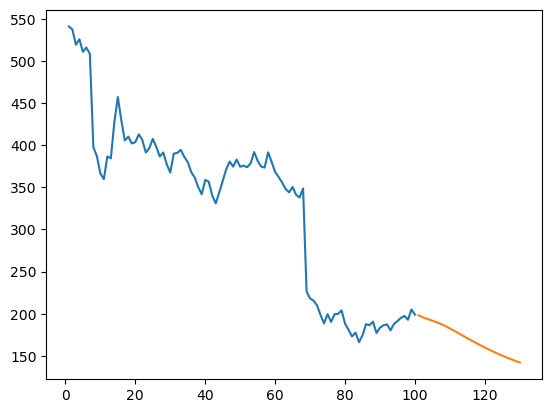

In [65]:
plt.plot(day_new,scaler.inverse_transform(netflix_data1[4944:]))
plt.plot(day_pred,scaler.inverse_transform(output_1st));

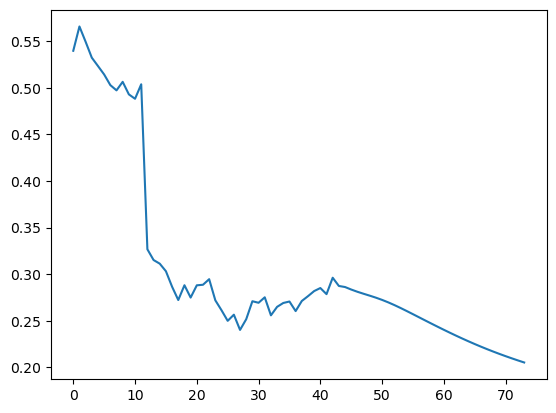

In [66]:
df3=netflix_data1.tolist()
df3.extend(output_1st)
plt.plot(df3[5000:])

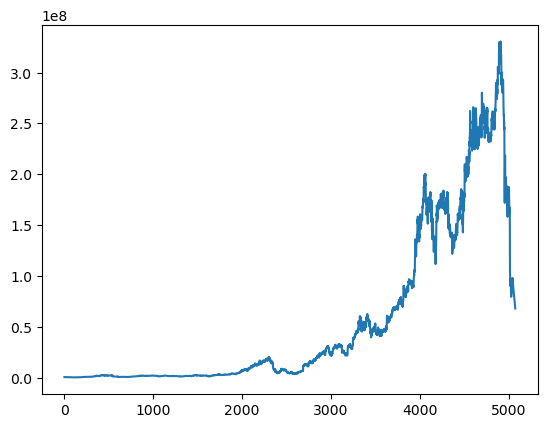

In [69]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3);